In [5]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
# upload arquivos
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [6]:
# criando o data frame
df = pd.read_excel('AdventureWorks.xlsx')

In [7]:
# visualizando as primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [8]:
# Linhas e colunas
df.shape

(904, 16)

In [10]:
# tipos
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [11]:
# Receita total
df['Valor Venda'].sum()

5984606.1426

In [14]:
# criando coluna custo - custo total
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
df['Custo'].sum()

2486783.05

In [13]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [16]:
# Lucro - resultado entre o custo e a receita (criando coluna - Lucro)
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [17]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [18]:
# lucro total
round(df['Lucro'].sum(),2)

3497823.09

In [20]:
# dias - envio - criando coluna - removendo (str)
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [21]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [22]:
df['Tempo_Envio'].dtypes

dtype('int64')

In [23]:
# media tempo envio por marca
df.groupby("Marca")["Tempo_Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

In [25]:
# verificação dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

In [28]:
# agrupar ano - marca - lucros
df.groupby([df['Data Venda'].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [30]:
# reset no index
lucro_ano = df.groupby([df['Data Venda'].dt.year, "Marca"]).sum().reset_index()
lucro_ano

,Data Venda,Marca,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Custo,Lucro,Tempo_Envio
0,2008,Adventure Works,28346,38616,1958392,35903.74,78074.00,908,65112.2000,6.231518e+05,316510.64,3.066412e+05,881
1,2008,Contoso,21620,199720,1520909,407.20,799.20,14633,15285.6990,1.308980e+05,74481.97,5.641600e+04,669
2,2008,Fabrikam,76472,341471,5432533,93853.59,283272.00,2671,212036.1200,2.433558e+06,876537.33,1.557021e+06,2357
3,2009,Adventure Works,36866,50562,2572741,47058.30,102330.00,1228,97372.6800,8.334513e+05,428056.24,4.053951e+05,1181
4,2009,Contoso,24552,229677,1753740,468.28,919.08,35607,36215.3484,3.194986e+05,181239.63,1.382590e+05,788
5,2009,Fabrikam,56238,247570,3963985,68202.45,205851.00,1860,196945.4100,1.644049e+06,609957.24,1.034091e+06,1847


In [31]:
# soma produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

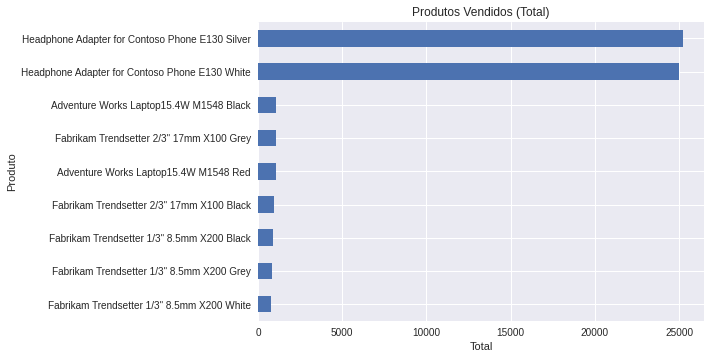

In [32]:
# plotagem gráfica produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Produtos Vendidos (Total)")
plt.xlabel('Total')
plt.ylabel('Produto')

Text(0, 0.5, 'Receita')

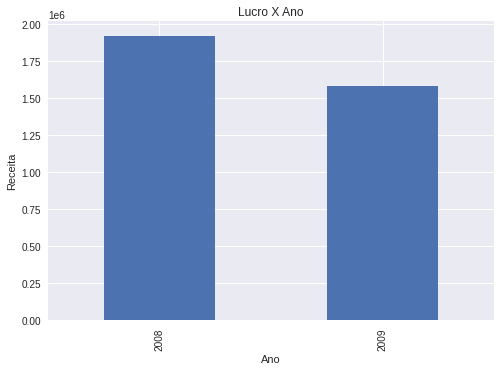

In [34]:
# plotagem lucro x ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title="Lucro X Ano")
plt.xlabel('Ano')
plt.ylabel('Receita')

In [35]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008    1.920078e+06
2009    1.577745e+06
Name: Lucro, dtype: float64

In [36]:
# filtro vendas 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [37]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,4


Text(0, 0.5, 'Lucro')

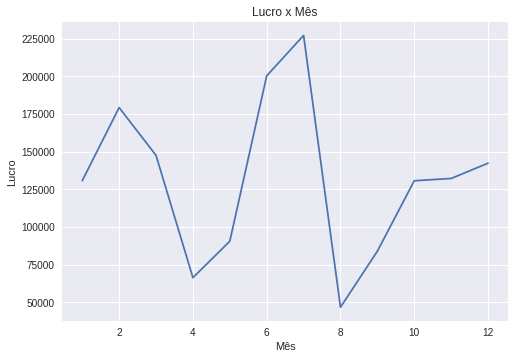

In [39]:
# lucro - mensal - ano 2009
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title="Lucro x Mês")
plt.xlabel('Mês')
plt.ylabel('Lucro')

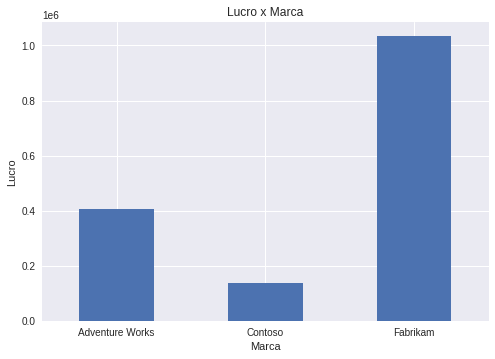

In [40]:
# lucro - marca - ano 2009
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro');
plt.xticks(rotation='horizontal');

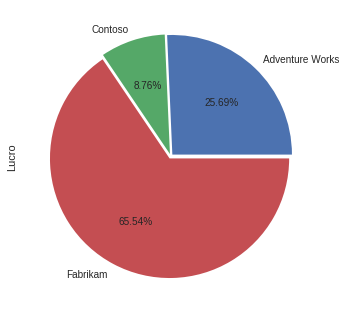

In [43]:
df_2009.groupby('Marca')['Lucro'].sum().plot.pie(explode=[0.02,0.02,0.02],autopct=lambda p: f'{p:.2f}%');

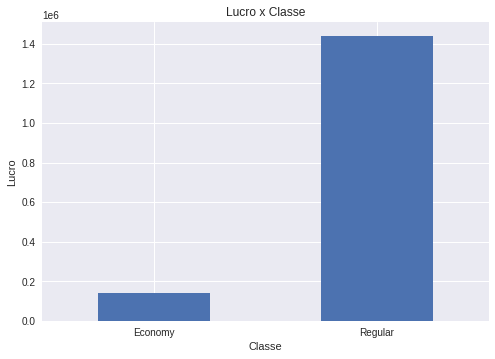

In [44]:
# lucro x classe
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro");
plt.xticks(rotation='horizontal');

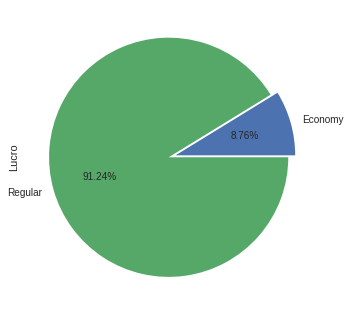

In [48]:
df_2009.groupby('Classe')['Lucro'].sum().plot.pie(explode=[0.03,0.03], autopct=lambda p: f'{p:.2f}%');

In [49]:
df_2009.groupby('Classe')['Lucro'].sum()

Classe
Economy    1.382590e+05
Regular    1.439486e+06
Name: Lucro, dtype: float64

In [50]:
# estatistica - tempo envio
df['Tempo_Envio'].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: Tempo_Envio, dtype: float64

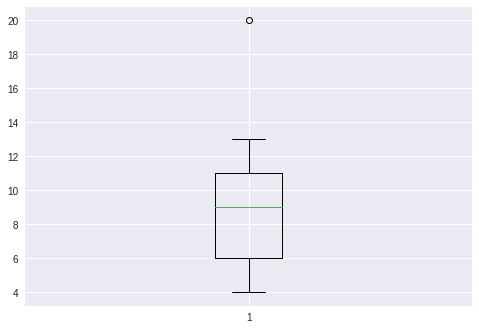

In [51]:
# boxplot
plt.boxplot(df['Tempo_Envio']);

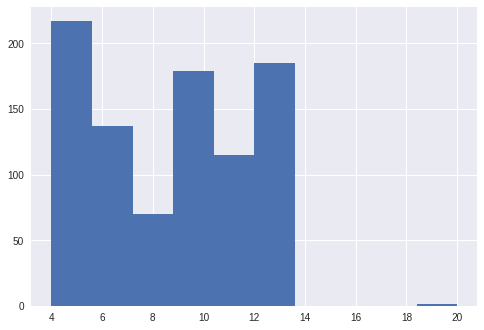

In [52]:
# histograma
plt.hist(df['Tempo_Envio'])

In [55]:
# envio max
df['Tempo_Envio'].max()

20

In [56]:
# envio min
df['Tempo_Envio'].min()

4

In [57]:
# identificando o outlier 
df[df["Tempo_Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [58]:
# salvando o df em csv
df.to_csv('df_vendas_novo.csv', index=False)